In [19]:
import pandas as pd


df = pd.read_csv('heart-failure.csv')

df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


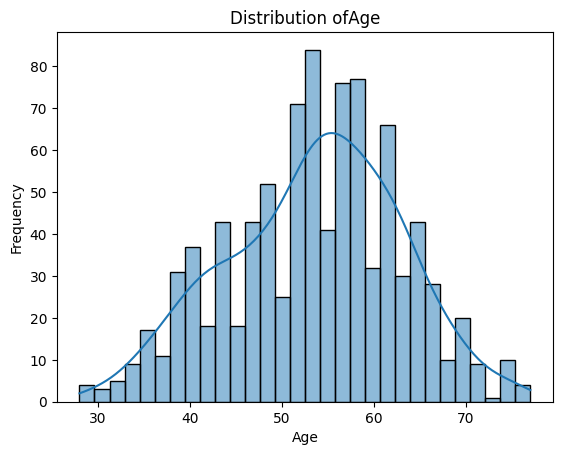

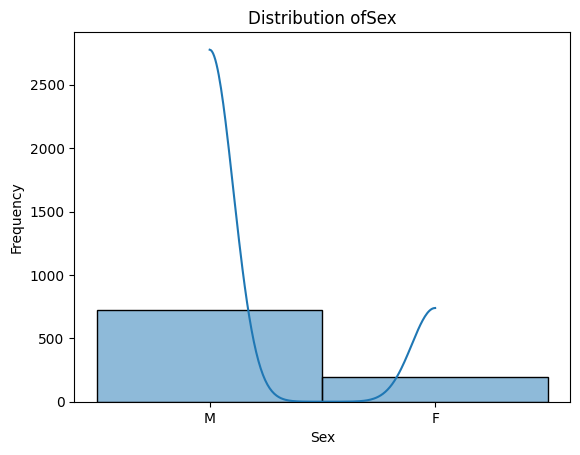

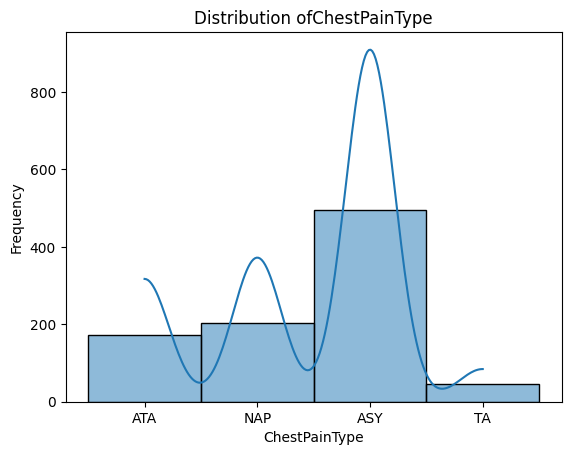

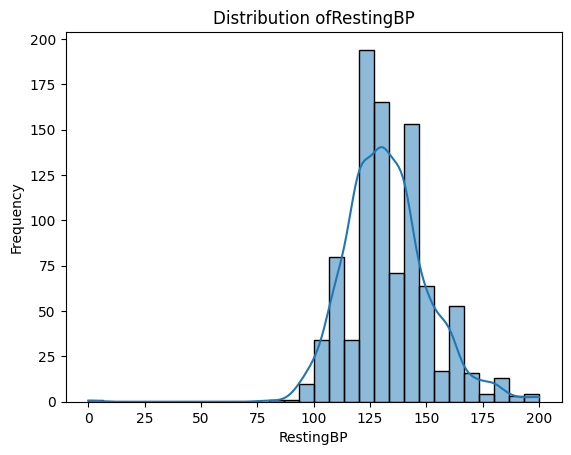

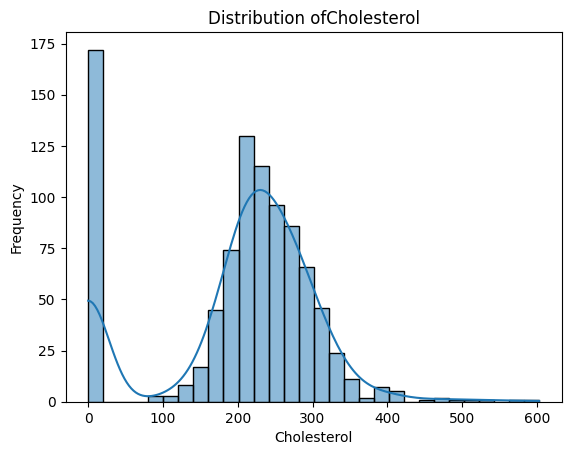

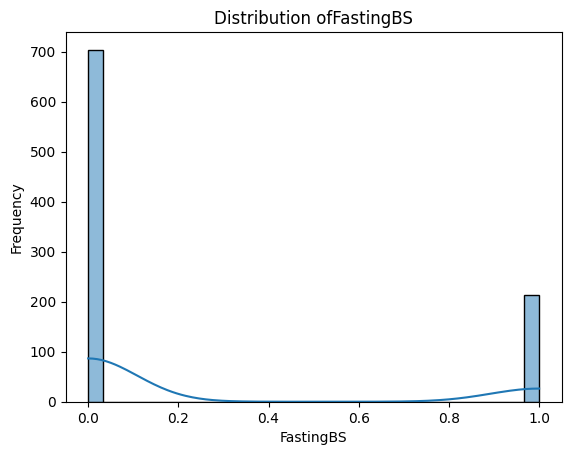

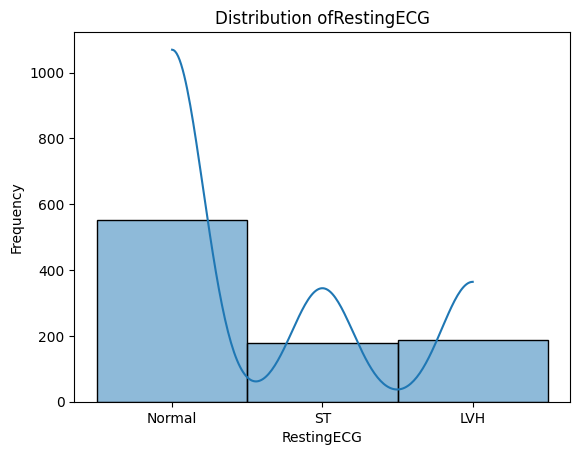

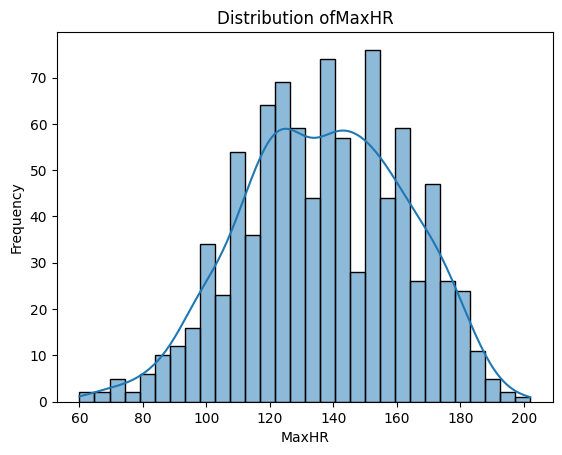

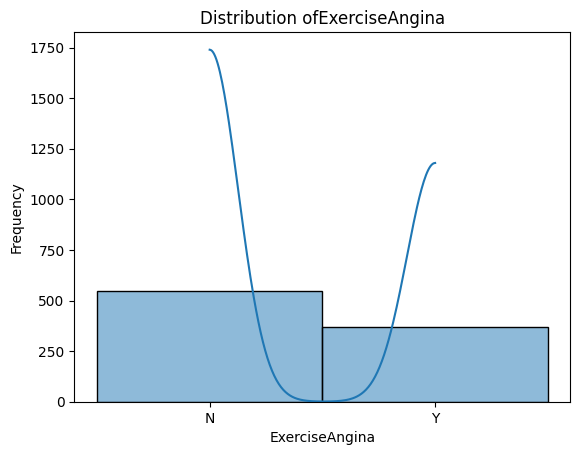

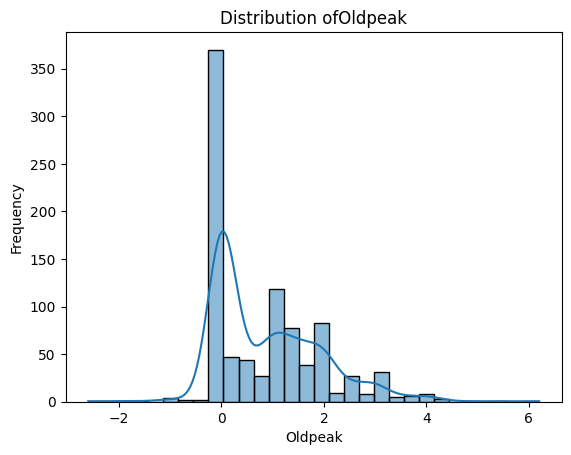

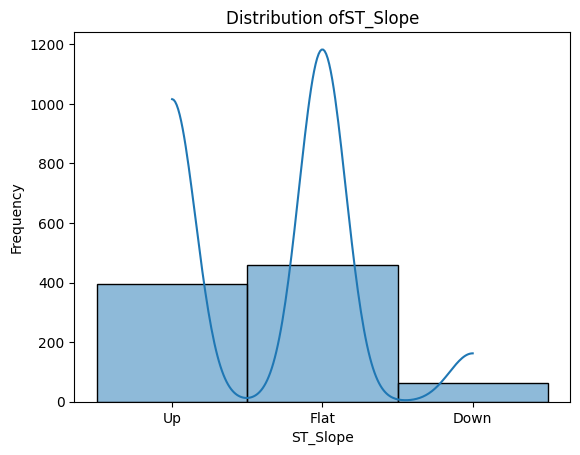

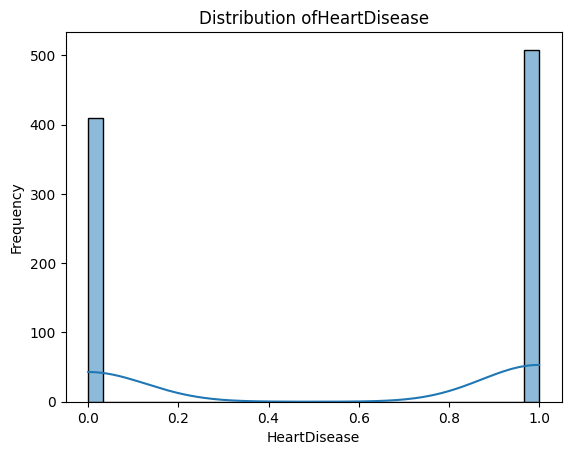

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df.columns:
  sns.histplot(df[column], bins=30, kde=True)
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title('Distribution of' + column)
  plt.show()


In [21]:
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})
df['ST_Slope'] = df['ST_Slope'].map({'Up': 0,'Flat': 1, 'Down': 2})
df['RestingECG'] = df['RestingECG'].map({'Normal': 0,'ST': 1, 'LVH': 2})
df['ChestPainType'] = df['ChestPainType'].map({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA':3})

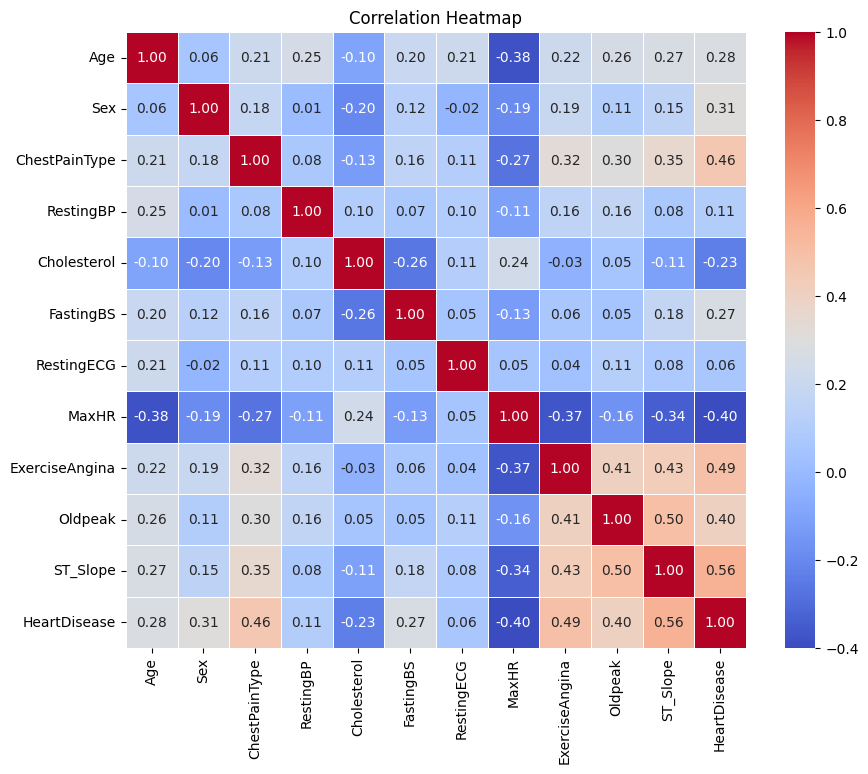

In [22]:
correlation= df.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

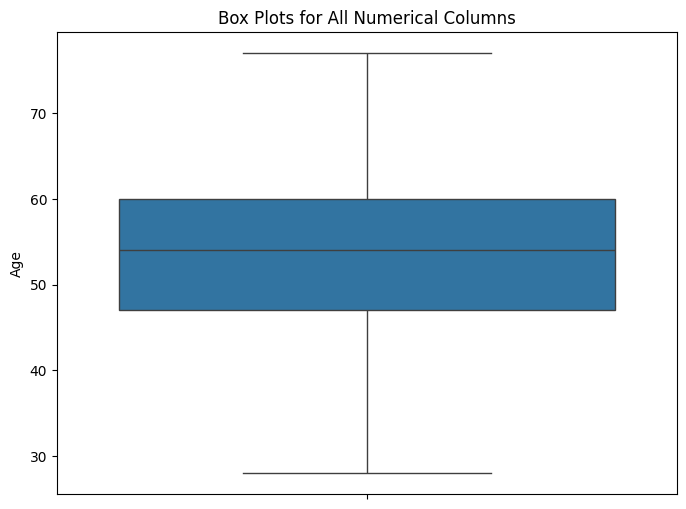

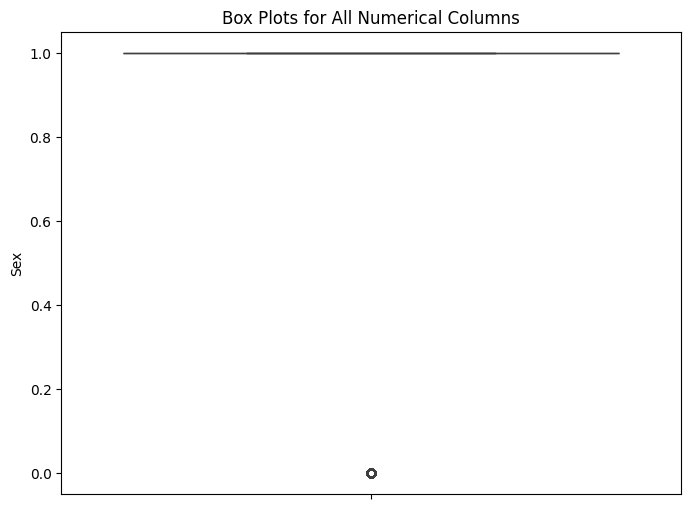

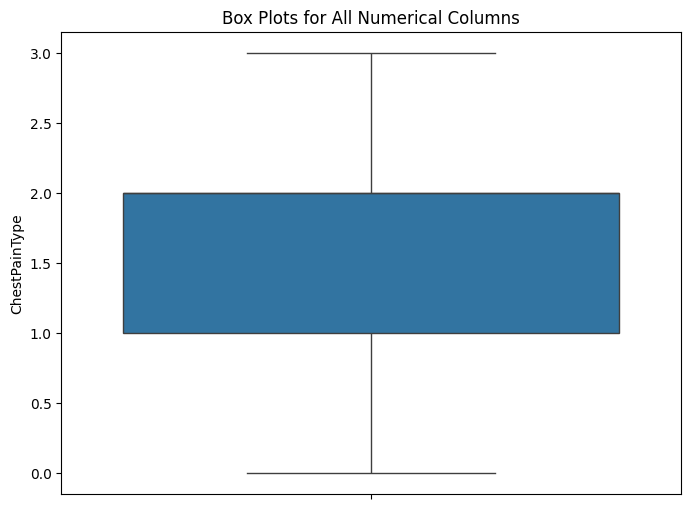

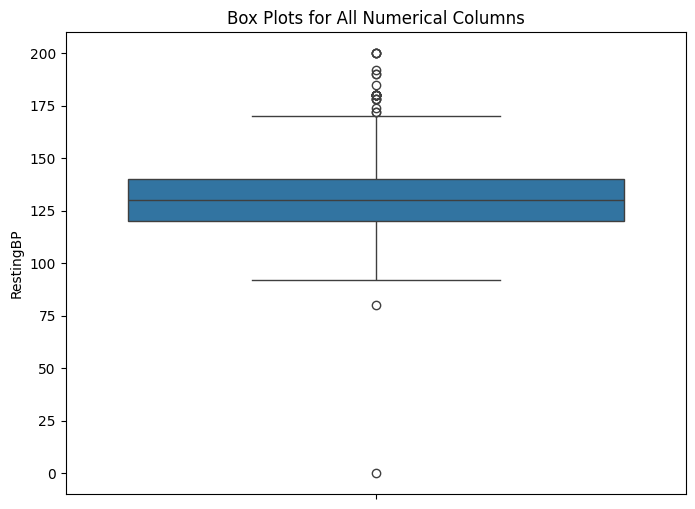

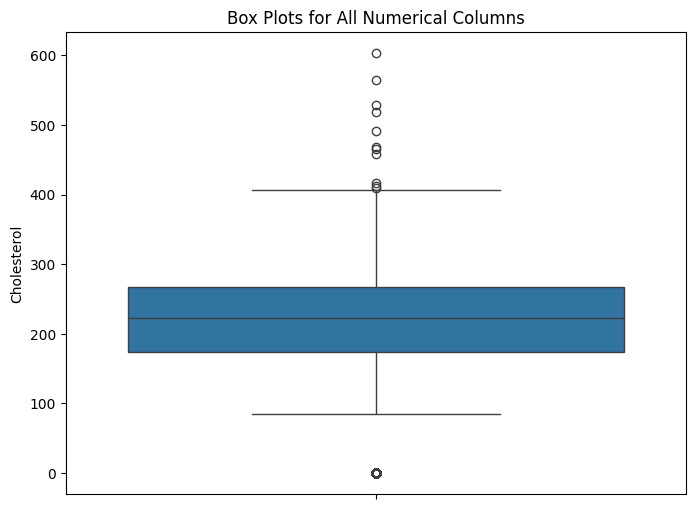

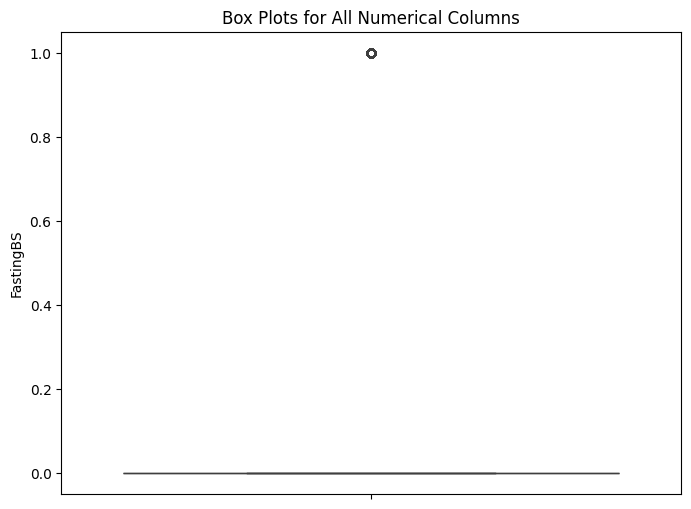

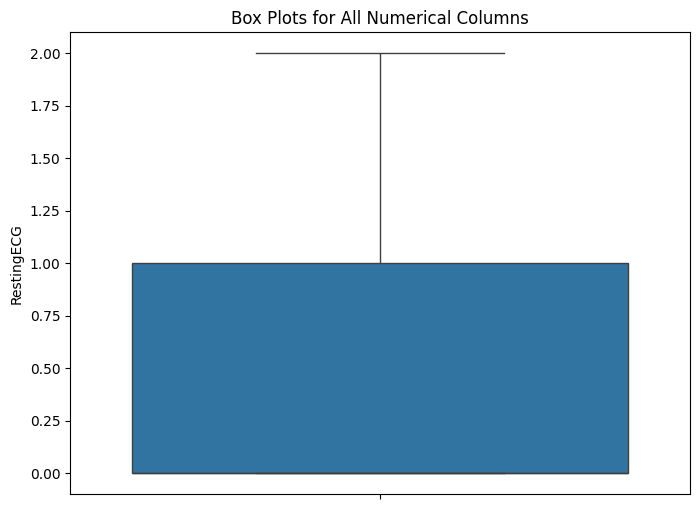

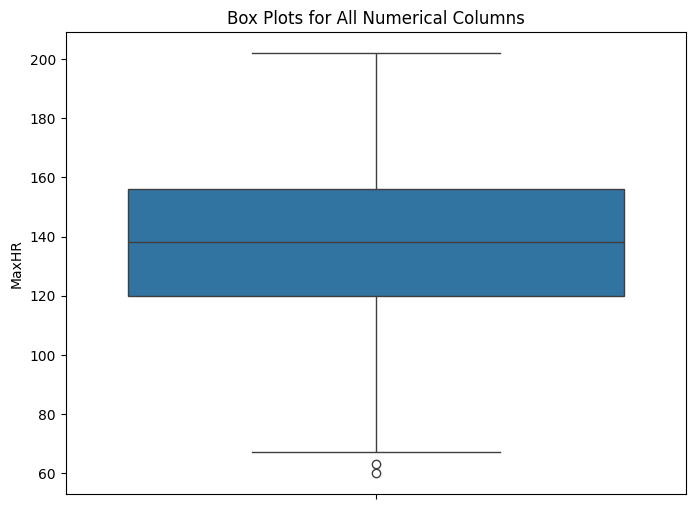

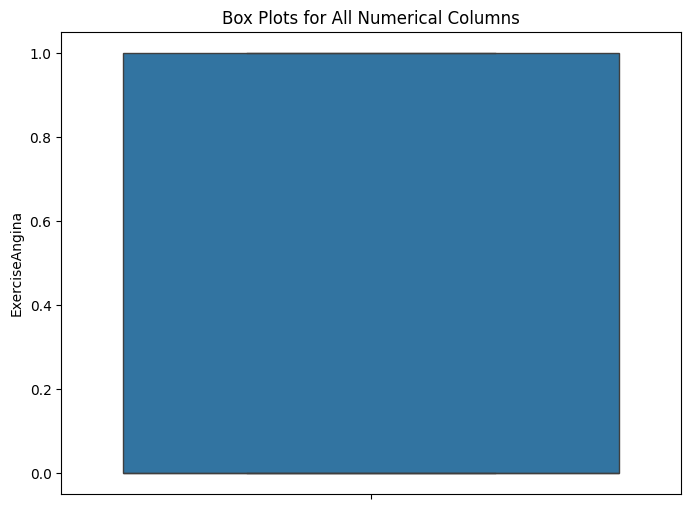

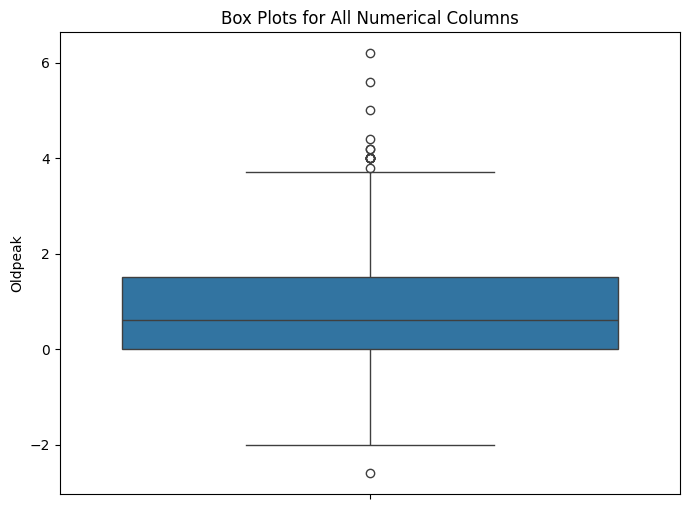

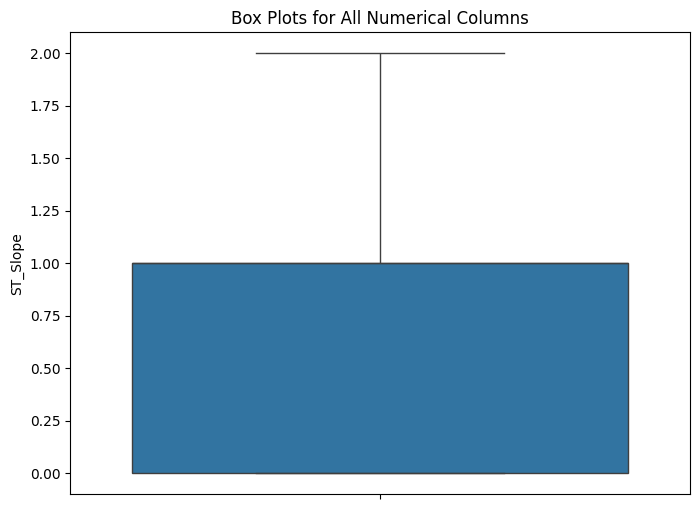

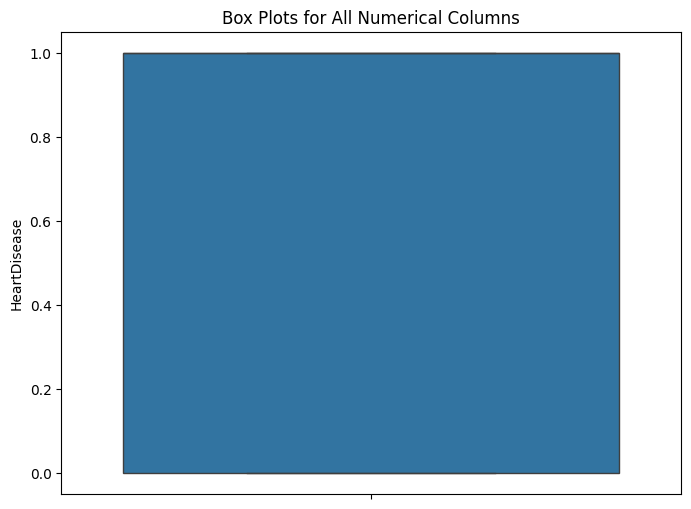

In [23]:
for column in df.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(data=df[column])
  plt.title('Box Plots for All Numerical Columns')
  plt.xticks(rotation=90)
  plt.show()

# ANN training

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [61]:
x = df[sorted(df.columns)]
x = x.drop('HeartDisease', axis=1)
y = df['HeartDisease']



trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [62]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [67]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(10,2),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

In [68]:
mlp_clf.fit(trainX_scaled, trainY)

/home/gabriel/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 2), max_iter=300)

In [69]:
trainY

118    0
677    0
805    0
452    1
751    0
      ..
488    0
493    1
804    1
442    1
461    1
Name: HeartDisease, Length: 734, dtype: int64

In [71]:
y_pred = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))


Accuracy: 0.83


In [72]:
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        88
           1       0.82      0.85      0.84        96

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.83       184
weighted avg       0.83      0.83      0.83       184



In [73]:
import pickle

with open('heart-failure-mlp.pkl', 'wb') as file:
    pickle.dump(mlp_clf, file)

with open('heart-failure-scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [75]:
a = [1.0, 0.50, 0.50, 0.500, 1.000, 1.0, 1.000, 1.000, 1.0, 1.00, 1.0]
import numpy as np
import random
a = []

r=1
res = mlp_clf.predict(trainX_scaled)
for r in res:
    print(r) if r==1 else None
print(a)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
[]
